In [36]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [37]:
def gen_cor_rnd(coe, path):
    A = np.array([[1,coe],[coe,1]])
    L = cholesky(A).T
    rnd = np.random.standard_normal((path,2))
    cor_rnd = np.dot(rnd, L)
#     print(   np.corrcoef(cor_rnd[:,0],cor_rnd[:,1])    )
    return cor_rnd

In [38]:
def quickplot(x, y):
    plt.figure(figsize = (10,6))
    plt.plot(x, y)
    plt.xlabel("$ \\rho $", fontsize = 16)
    plt.ylabel("Expected Value", fontsize = 16)

In [46]:
# parameters
S0 = 100; K = 100; T = 0.25; v= 0.25; r = 0.04; q = 0.01
path = 2000000 # how many paths in one simulation
num = 80 # how many points from -0.99 to 0.99

coes = np.linspace(-0.99, 0.99, num)
value = np.zeros(num)

In [47]:
# Worst of Option
K=100
for i,coe in enumerate(coes):
    rnd = gen_cor_rnd(coe, path)
    St = S0 * np.exp((r - q - v ** 2 / 2) * T + np.sqrt(T) * v * rnd)
    payoff = np.maximum(K-np.min(St, axis = 1),0)
    value[i] = np.mean(payoff)/np.exp(-r*T)

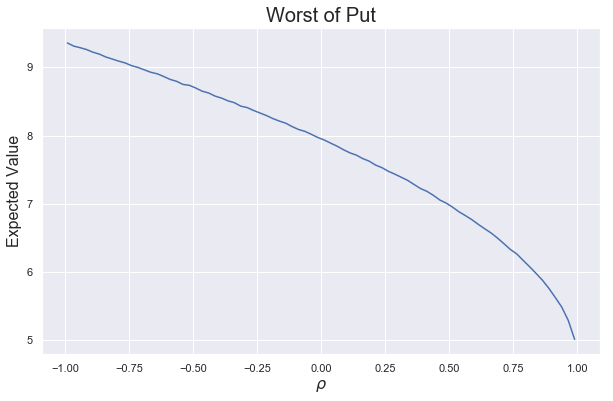

In [48]:
quickplot(coes, value)
plt.title("Worst of Put",size = 20);

In [49]:
# Basket Option
for i,coe in enumerate(coes):
    rnd = gen_cor_rnd(coe, path)
    St = S0 * np.exp((r - q - v ** 2 / 2) * T + np.sqrt(T) * v * rnd)
    payoff = np.maximum(np.mean(St, axis = 1)-K, 0)
    value[i] = np.mean(payoff)/np.exp(-r*T)

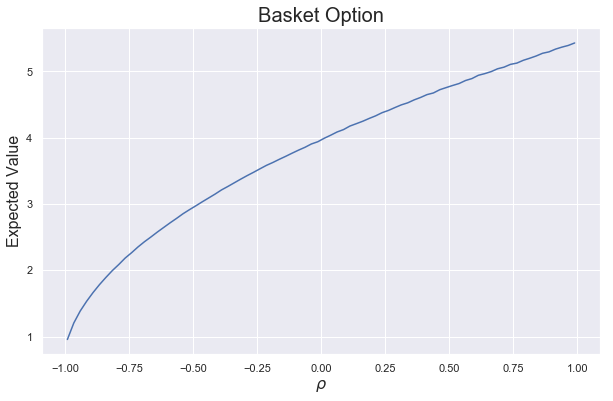

In [50]:
quickplot(coes, value)
plt.title("Basket Option",size = 20);

In [51]:
# Digital Option
for i,coe in enumerate(coes):
    rnd = gen_cor_rnd(coe, path)
    St = S0 * np.exp((r - q - v ** 2 / 2) * T + np.sqrt(T) * v * rnd)
    payoff = ((St[:,0]>110) & (St[:,1]<90)) * 1
    value[i] = np.mean(payoff)/np.exp(-r*T)

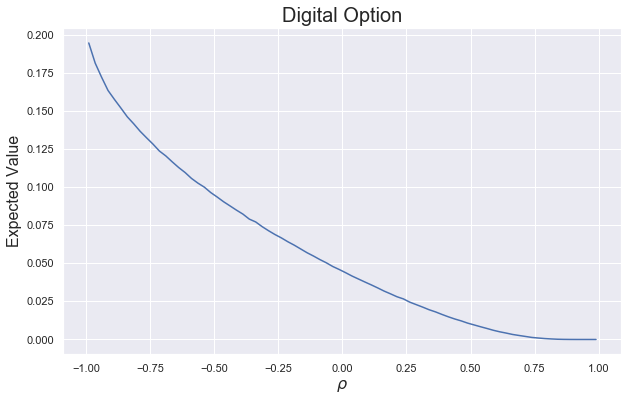

In [52]:
quickplot(coes, value)
plt.title("Digital Option",size = 20);